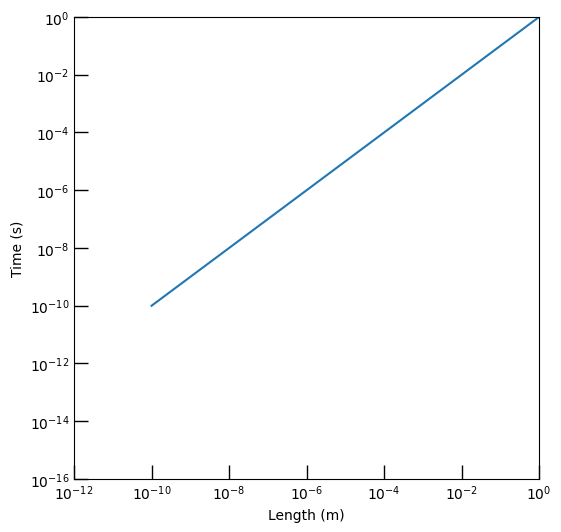

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
# Create the plot with square aspect ratio
plt.figure(figsize=(6, 6))

# Add labels and title with larger font
plt.xlabel('Length (m)')
plt.ylabel('Time (s)')

# Show ticks on all sides and add minor ticks
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8)
# ax.tick_params(top=True, right=True)

# ax.set_xticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])
# ax.set_yticks([1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1])

# ax.xaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.xaxis.set_minor_formatter(NullFormatter())

# ax.yaxis.set_minor_locator(LogLocator(subs="auto") )
# ax.yaxis.set_minor_formatter(NullFormatter())


# Ensure that the tick labels include the value 1
ax.set_xlim(1e-12, 1)
ax.set_ylim(1e-16, 1)
# Use LaTeX-style fonts for better PDF compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Add a sample plot (replace with your actual data)
import numpy as np
x = np.logspace(-10, 2, 100)
y = x
plt.loglog(x, y)

plt.savefig('loglog.pdf')

In [ ]:
from pymatgen.core import Structure

# create a structure with a line of positive and negative charges
structure = Structure(
    lattice=[[10, 0, 0], [0, 10, 0], [0, 0, 10]],
    species=["Li", "Li", "Li", "Li", "Li"],
    coords=[[0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0]],
    site_properties={"charge": [1, 1, 1, 1, 1]}
)
print(structure)

# calculate ewald sum
from pymatgen.analysis.ewald import EwaldSummation
ewald = EwaldSummation(structure)
print(ewald.total_energy)
print(ewald.point_energy)
print(ewald.real_space_energy)

# Define positions and potentials
positions = np.linspace(-5, 5, 100)
total_potential = np.array([ewald.get_site_energy(i) for i, site in enumerate(structure.sites)])
real_potential = np.array([ewald.get_site_energy_real(site) for site in structure.sites])
recip_potential = np.array([ewald.get_site_energy_recip(site) for site in structure.sites])

# Plot total charge distribution as a function of x position
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Total charge distribution
ax1.plot(positions, total_potential, label='Total Potential')
ax1.set_title('Ewald Summation (Total)')
ax1.set_xlabel('Position')
ax1.set_ylabel('Potential')
ax1.legend()

# Real space charge distribution
ax2.plot(positions, real_potential, label='Real Space Potential', color='g')
ax2.set_title('Real Space Sum')
ax2.set_xlabel('Position')
ax2.legend()

# Reciprocal space charge distribution
ax3.plot(positions, recip_potential, label='Reciprocal Space Potential', color='r')
ax3.set_title('Reciprocal Space Sum')
ax3.set_xlabel('Position')
ax3.legend()


plt.tight_layout()
plt.show()

Full Formula (Li5)
Reduced Formula: Li
abc   :  10.000000  10.000000  10.000000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c    charge
---  ----  ---  ---  ---  --------
  0  Li      0    0    0         1
  1  Li      1    0    0         1
  2  Li      2    0    0         1
  3  Li      3    0    0         1
  4  Li      4    0    0         1
-3.7088134333484843
-8.886504638513825
0.21523763729302575


AttributeError: 'EwaldSummation' object has no attribute 'get_site_energy_real'

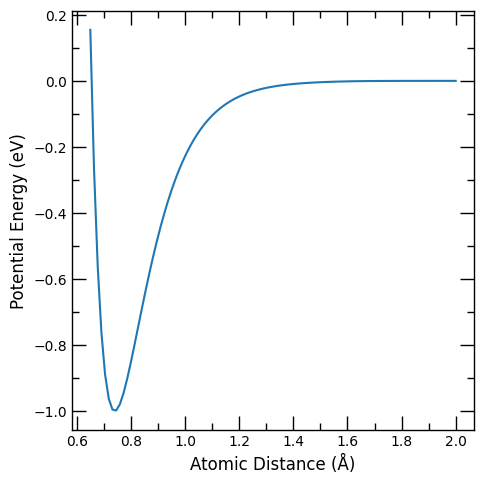

In [11]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullFormatter, AutoMinorLocator
import matplotlib as mpl

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create a range of distances
distances = np.linspace(0.65, 2, 100)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

fig,ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)


# Plot the results
ax.plot(distances, energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('morse_potential.pdf')

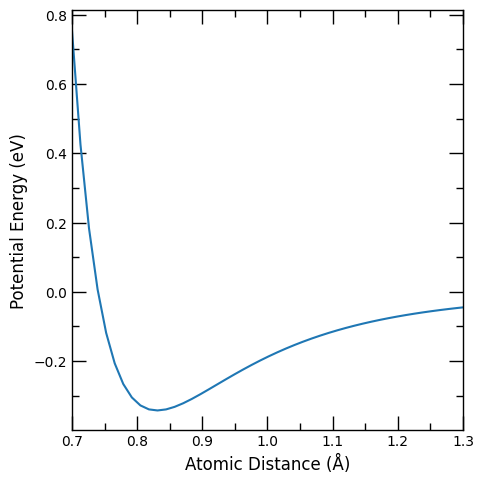

In [17]:
# Define Lennard-Jones potential function
def lennard_jones_potential(r, epsilon=0.3429, sigma=0.74):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Create a range of distances
distances = np.linspace(0.7, 2, 100)

# Calculate Lennard-Jones potential for each distance
lj_energies = lennard_jones_potential(distances)

fig, ax = plt.subplots(figsize=(5, 5))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)
ax.set_xlim(0.7,1.3)
# Plot the Lennard-Jones potential
ax.plot(distances, lj_energies)
ax.set_xlabel('Atomic Distance (Å)')
ax.set_ylabel('Potential Energy (eV)')
fig.tight_layout()
fig.savefig('lennard_jones_potential.pdf')
plt.show()


Approximation of π: 3.1362
Error: 0.005392653589793017


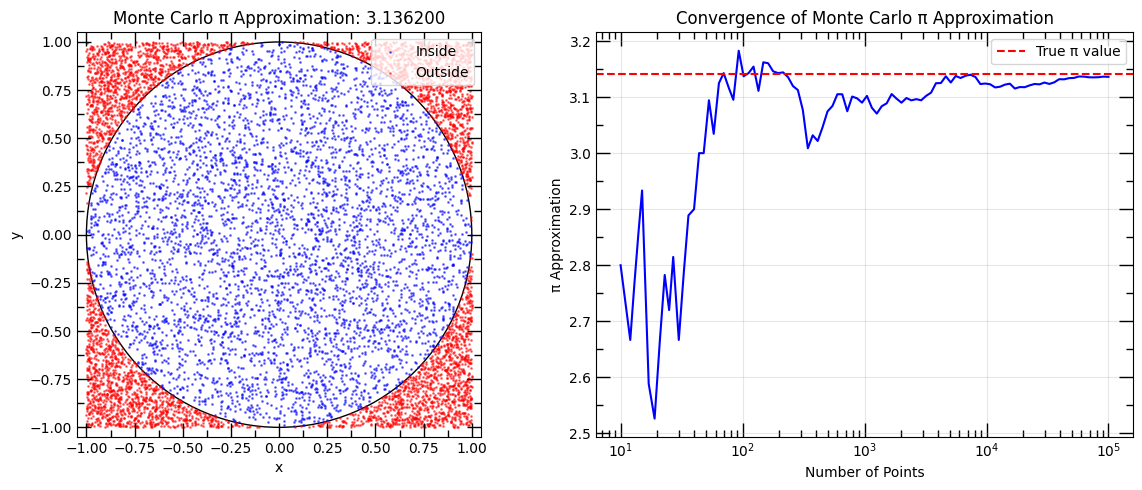

In [3]:
# Monte Carlo simulation to compute π with step-by-step tracking
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Number of points to use in the simulation
n_points = 100000
inside_circle = 0
x_inside, y_inside = [], []
x_outside, y_outside = [], []

# Track pi approximation at different steps
tracking_points = np.logspace(1, np.log10(n_points), num=100).astype(int)
tracking_points = sorted(list(set(tracking_points)))
pi_estimates = []
steps = []

# Run the Monte Carlo simulation
for i in range(n_points):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    distance = x**2 + y**2
    
    if distance <= 1:
        inside_circle += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)
    
    # Record the approximation at specified tracking points
    if i+1 in tracking_points:
        pi_approx = 4 * inside_circle / (i+1)
        pi_estimates.append(pi_approx)
        steps.append(i+1)

# Calculate final π approximation
pi_approx = 4 * inside_circle / n_points
print(f"Approximation of π: {pi_approx}")
print(f"Error: {abs(pi_approx - np.pi)}")

# Create a single figure with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Apply the consistent style to both axes
for ax in [ax1, ax2]:
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
    ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
    ax.tick_params(top=True, right=True)

# Panel 1: Monte Carlo points
# Plot the unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='-')
ax1.add_artist(circle)

# Plot sample points (using a smaller subset for clarity)
sample_size = 5000
ax1.scatter(x_inside[:sample_size], y_inside[:sample_size], s=1, color='blue', alpha=0.5, label='Inside')
ax1.scatter(x_outside[:sample_size], y_outside[:sample_size], s=1, color='red', alpha=0.5, label='Outside')

# Add square boundaries
ax1.set_xlim(-1.05, 1.05)
ax1.set_ylim(-1.05, 1.05)
ax1.set_aspect('equal')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(f'Monte Carlo π Approximation: {pi_approx:.6f}')
ax1.legend(loc='upper right')

# Panel 2: Convergence plot
ax2.plot(steps, pi_estimates, 'b-')
ax2.axhline(y=np.pi, color='r', linestyle='--', label='True π value')
ax2.set_xscale('log')
ax2.set_xlabel('Number of Points')
ax2.set_ylabel('π Approximation')
ax2.set_title('Convergence of Monte Carlo π Approximation')
ax2.legend()
ax2.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig('monte_carlo_pi_combined.pdf')
plt.show()


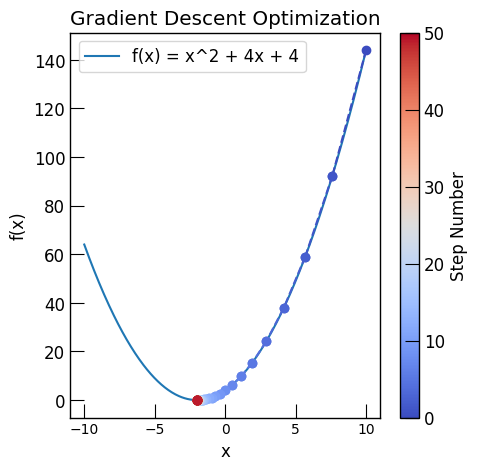

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib as mpl

mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Define the function to minimize (e.g., a simple quadratic function)
def f(x):
    return x**2 + 4*x + 4

# Define the gradient of the function
def grad_f(x):
    return 2*x + 4

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 50
x_start = 10

# Perform gradient descent
x_values = [x_start]
for _ in range(n_iterations):
    x_new = x_values[-1] - learning_rate * grad_f(x_values[-1])
    x_values.append(x_new)

# Generate x values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = f(x_plot)

# Plot the function and the gradient descent trajectory
plt.figure(figsize=(5, 5))
plt.plot(x_plot, y_plot, label='f(x) = x^2 + 4x + 4')

# Use a colormap to show the number of steps
norm = Normalize(vmin=0, vmax=len(x_values) - 1)
colors = plt.cm.coolwarm(norm(range(len(x_values))))
for i in range(len(x_values) - 1):
    plt.plot(x_values[i:i+2], [f(x_values[i]), f(x_values[i+1])], color=colors[i], marker='o', ls='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()

# Create a new axis for the colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
plt.show()

Global minimum found at: [-5.1229968]
Function value at global minimum: 58.682693745580956


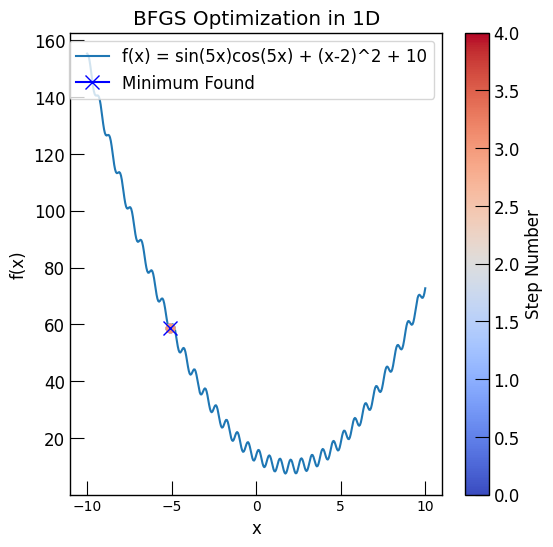

In [6]:
from scipy.optimize import minimize

# Define the complex 1D function to minimize with deeper and wider local minima
def f(x):
    return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Define the gradient of the complex 1D function
def grad_f(x):
    df_dx = 5 * (5 * np.cos(5 * x) * np.cos(5 * x) - 5 * np.sin(5 * x) * np.sin(5 * x)) + 2 * (x - 2)
    return np.array([df_dx]).flatten()

# Initial guess
x0 = np.array([-10])

# List to store the trajectory
trajectory_bfgs = []

# Callback function to record the trajectory
def callback_bfgs(x):
    trajectory_bfgs.append(np.copy(x))

# Perform BFGS optimization
result_bfgs = minimize(f, x0, method='BFGS', jac=grad_f, callback=callback_bfgs)

print("Global minimum found at:", result_bfgs.x)
print("Function value at global minimum:", result_bfgs.fun)

# Convert trajectory to numpy array for easier plotting
trajectory_bfgs = np.array(trajectory_bfgs).flatten()

# Generate x values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = f(x_plot)

# Plot the function and the optimization path
plt.figure(figsize=(6, 6))
plt.plot(x_plot, y_plot, label='f(x) = sin(5x)cos(5x) + (x-2)^2 + 10')

# Use a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(trajectory_bfgs) - 1)
colors = plt.cm.coolwarm(norm(range(len(trajectory_bfgs))))
for i in range(len(trajectory_bfgs) - 1):
    plt.plot(trajectory_bfgs[i:i+2], f(trajectory_bfgs[i:i+2]), color=colors[i], marker='o', ls='--')

plt.plot(result_bfgs.x, result_bfgs.fun, marker='x', color='blue', markersize=10, label='Minimum Found')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BFGS Optimization in 1D')
plt.legend()

# Create a colorbar to show the sequence of points
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
plt.show()

/var/folders/b4/hm0mlm2x6_g1cbpp4c29f62h0000gn/T/ipykernel_3576/3069308193.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


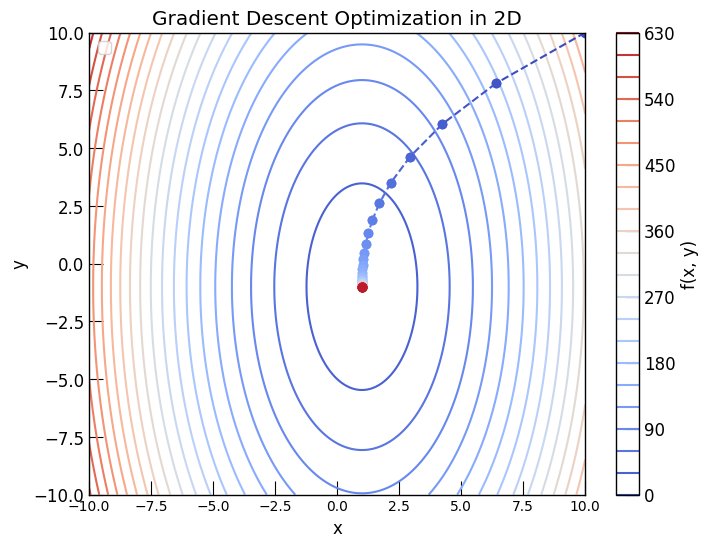

In [8]:
# Define the 2D function to minimize (e.g., a more complex function with a single minimum)
def f_2d(x, y):
    return ((2*x-2)**2 + (y+1)**2) + 10 

# Define the gradient of the 2D function
def grad_f_2d(x, y):
    df_dx = 4 * (x - 1)
    df_dy = 2 * (y + 1)
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 50
x_start = np.array([10, 10])

# Perform gradient descent
x_values_2d = [x_start]
for _ in range(n_iterations):
    x_new = x_values_2d[-1] - learning_rate * grad_f_2d(x_values_2d[-1][0], x_values_2d[-1][1])
    x_values_2d.append(x_new)

# Convert list to numpy array for easier indexing
x_values_2d = np.array(x_values_2d)

# Generate x and y values for plotting the function
x_plot = np.linspace(-10, 10, 400)
y_plot = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x_plot, y_plot)
Z = f_2d(X, Y)

# Generate a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(x_values_2d) - 1)
colors = plt.cm.coolwarm(norm(range(len(x_values_2d))))

# Plot the function and the gradient descent trajectory
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.colorbar(contour, label='f(x, y)')
# plt.plot(x_values_2d[:, 0], x_values_2d[:, 1], marker='o', color=colors[i], label='Gradient Descent Path')
for i in range(len(x_values_2d) - 1):
    plt.plot(x_values_2d[i:i+2, 0], x_values_2d[i:i+2, 1], color=colors[i], marker='o', ls='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Optimization in 2D')
plt.legend()
plt.show()

Step  0 x =  [-3  3] f(x) =  58.69792892424646 grad_f(x) =  [ 4.60170287 22.79415498]
Step  1 x =  [-1.97590361 -1.09638554] f(x) =  9.684872953727023 grad_f(x) =  [-17.01391196   5.59717419]


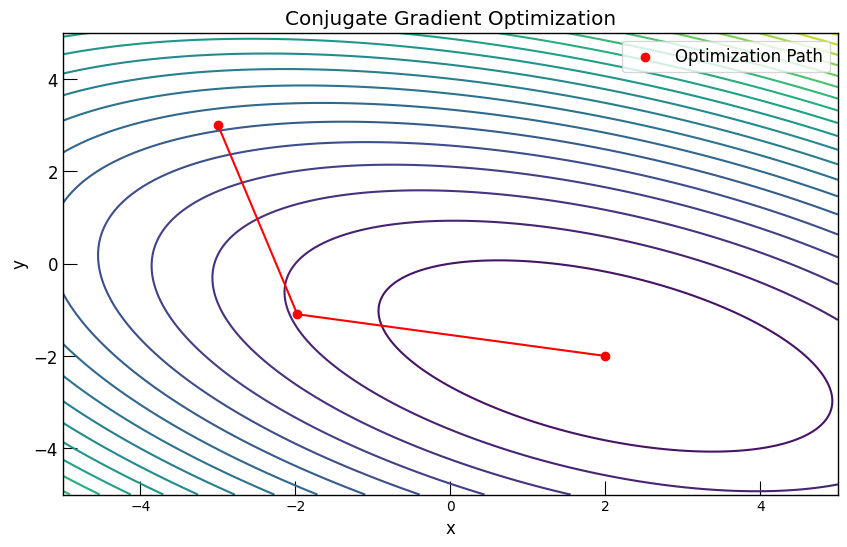

Minimum found at x = [ 2. -2.], f(x) = -17.052230580857703


In [9]:
import numpy as np

import matplotlib.pyplot as plt

# Define a more complex non-quadratic objective function with multiple local minima
def f(x, A, b):
    return 0.5 * x.T.dot(A).dot(x) - b.T.dot(x) + 5 * np.sin(2 * x[0]) + 5 * np.cos(2 * x[1])

# Define the gradient of the function
def grad_f(x, A, b):
    return A.dot(x) - b + np.array([10 * np.cos(2 * x[0]), -10 * np.sin(2 * x[1])])


# Conjugate Gradient Method implementation
def conjugate_gradient(A, b, x0, tolerance=1e-6, max_iterations=100):
    x = x0
    r = b - A.dot(x)
    p = r
    rsold = np.dot(r.T, r)
    path = [x]
    
    for _ in range(max_iterations):
        print('Step ', _, 'x = ', x, 'f(x) = ',
              f(x, A, b), 'grad_f(x) = ', grad_f(x, A, b))
    
        Ap = A.dot(p)
        alpha = rsold / np.dot(p.T, Ap)
        x = x + alpha * p
        path.append(x)
        r = r - alpha * Ap
        rsnew = np.dot(r.T, r)
        
        if np.sqrt(rsnew) < tolerance:
            break
        
        p = r + (rsnew / rsold) * p
        rsold = rsnew
        
    return x, path


# Define the quadratic function parameters
A = np.array([[3, 2], [2, 6]])
b = np.array([2, -8])
x0 = np.array([-3, 3])  # Initial guess

# Run Conjugate Gradient Method
min_x, path = conjugate_gradient(A, b, x0)

# Generate data for the function plot
x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * (A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2) - (b[0]*X + b[1]*Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20)
path = np.array(path)
plt.scatter(path[:, 0], path[:, 1], color='red', label='Optimization Path')
plt.plot(path[:, 0], path[:, 1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Conjugate Gradient Optimization')
plt.legend()
plt.show()

print(f"Minimum found at x = {min_x}, f(x) = {f(min_x, A, b)}")


Global minimum found at: [1.73003584]
Function value at global minimum: 7.573463760500674


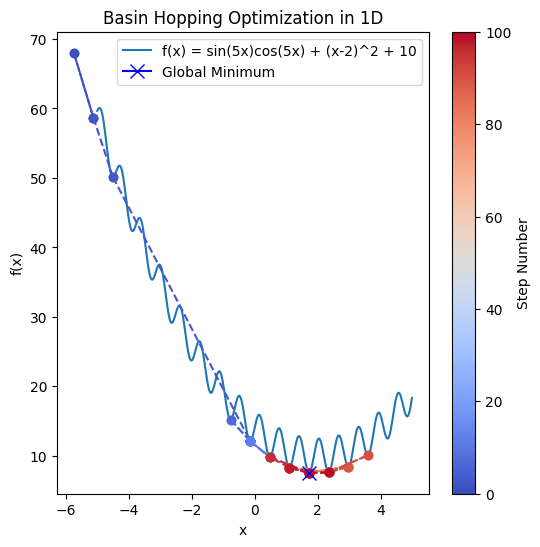

In [13]:
from scipy.optimize import basinhopping
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Define the complex 1D function to minimize with deeper and wider local minima
def complex_function_1d(x):
    return 5 * np.sin(5 * x) * np.cos(5 * x) + (x - 2)**2 + 10

# Define the gradient of the complex 1D function
def grad_complex_function_1d(x):
    df_dx = 5 * (5 * np.cos(5 * x) * np.cos(5 * x) - 5 * np.sin(5 * x) * np.sin(5 * x)) + 2 * (x - 2)
    return np.array([df_dx]).flatten()

# Initial guess
x0 = np.array([-10])

# List to store the trajectory
trajectory = []

# Callback function to record the trajectory
def callback(x, f, accept):
    trajectory.append(np.copy(x))

# Perform basin hopping optimization
result = basinhopping(complex_function_1d, x0, niter=100, minimizer_kwargs={"method": "BFGS", "jac": grad_complex_function_1d}, callback=callback)

print("Global minimum found at:", result.x)
print("Function value at global minimum:", result.fun)

# Convert trajectory to numpy array for easier plotting
trajectory = np.array(trajectory).flatten()

# Generate x values for plotting the function
x_plot = np.linspace(-5, 5, 400)
y_plot = complex_function_1d(x_plot)

# Plot the function and the optimization path
plt.figure(figsize=(6, 6))
plt.plot(x_plot, y_plot, label='f(x) = sin(5x)cos(5x) + (x-2)^2 + 10')

# Use a colormap to show the sequence of points in the trajectory
norm = Normalize(vmin=0, vmax=len(trajectory) - 1)
colors = plt.cm.coolwarm(norm(range(len(trajectory))))
for i in range(len(trajectory) - 1):
    plt.plot(trajectory[i:i+2], complex_function_1d(trajectory[i:i+2]), color=colors[i], marker='o', ls='--')

plt.plot(result.x, result.fun, marker='x', color='blue', markersize=10, label='Global Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Basin Hopping Optimization in 1D')
plt.legend()

# Create a colorbar to show the sequence of points
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=plt.gca(), label='Step Number')
plt.show()

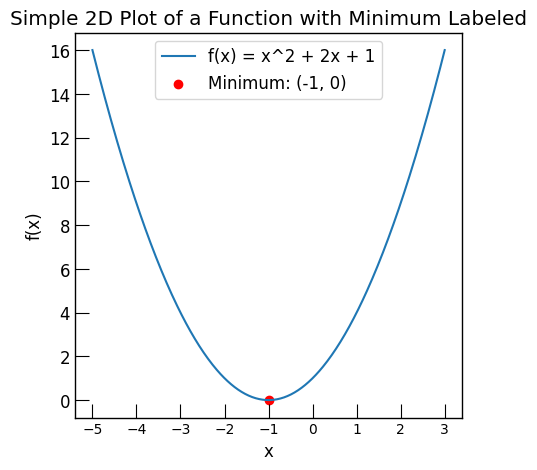

In [10]:
import numpy as np

import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return x**2 + 2*x + 1  # Example function: (x+1)^2

# Generate x values
x = np.linspace(-5, 3, 400)
y = f(x)

# Find the minimum point
x_min = -1
y_min = f(x_min)

# Create the plot
plt.figure(figsize=(5, 5))
plt.plot(x, y, label='f(x) = x^2 + 2x + 1')
plt.scatter(x_min, y_min, color='red', label=f'Minimum: ({x_min}, {y_min})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Simple 2D Plot of a Function with Minimum Labeled')
plt.legend()
plt.savefig('object_function.pdf')

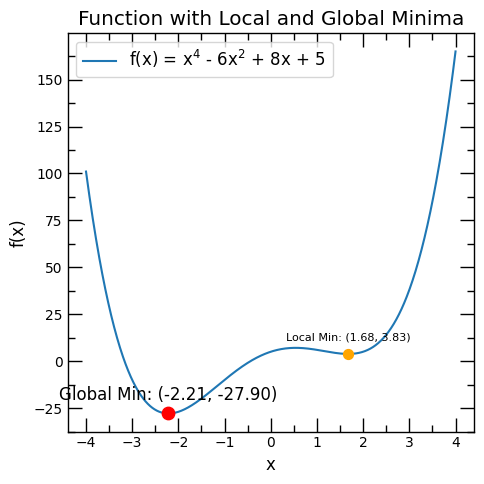

In [18]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Define the function to plot (a more complex one with local minima)
def f(x):
    return x**4 - 8*x**2 + 8*x + 5

# Generate x values with more density for better minima detection
x = np.linspace(-4, 4, 1000)
y = f(x)

# Find local minima using scipy's argrelextrema
# Using order parameter to look at more neighboring points
local_min_indices = argrelextrema(y, np.less, order=20)[0]
local_min_x = x[local_min_indices]
local_min_y = y[local_min_indices]

# Find global minimum
global_min_index = np.argmin(y)
global_min_x = x[global_min_index]
global_min_y = y[global_min_index]

# Create the plot with the styling consistent with other plots
plt.figure(figsize=(5, 5))

# Apply consistent styling from previous cells
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='major', length=10, width=1.0, direction='in', labelsize=10)
ax.tick_params(which='minor', length=5, width=1.0, direction='in', labelsize=8, top=True, right=True)
ax.tick_params(top=True, right=True)

# Plot the function
plt.plot(x, y, label='f(x) = x$^4$ - 6x$^2$ + 8x + 5')

# Plot all local minima
for i, (min_x, min_y) in enumerate(zip(local_min_x, local_min_y)):
    if abs(min_y - global_min_y) > 1e-6:  # Not the global minimum
        plt.scatter(min_x, min_y, color='orange', s=50, zorder=5)
        plt.annotate(f'Local Min: ({min_x:.2f}, {min_y:.2f})', 
                    (min_x, min_y), 
                    textcoords="offset points",
                    xytext=(0,10), 
                    ha='center',
                    fontsize=8)

# Highlight global minimum
plt.scatter(global_min_x, global_min_y, color='red', s=80, zorder=5)
plt.annotate(f'Global Min: ({global_min_x:.2f}, {global_min_y:.2f})', 
            (global_min_x, global_min_y), 
            textcoords="offset points",
            xytext=(0,10), 
            ha='center')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function with Local and Global Minima')
plt.legend()
plt.tight_layout()
plt.savefig('function_with_minima.pdf')
plt.show()

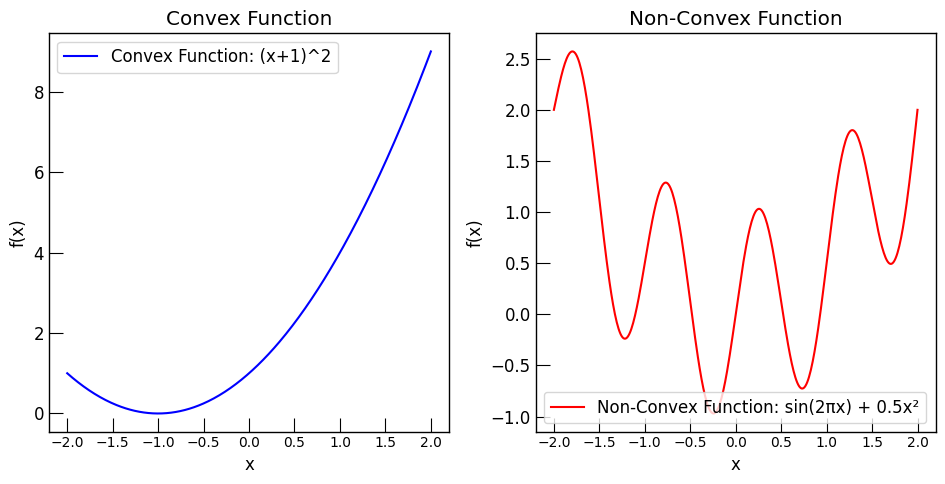

In [6]:
import numpy as np

import matplotlib.pyplot as plt

# Define a convex function (e.g., quadratic function)
def convex_function(x):
    return x**2 + 2*x + 1  # Example: (x+1)^2

# Define a non-convex function (e.g., sinusoidal function with additional terms)
def non_convex_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x**2

# Generate x values
x = np.linspace(-2, 2, 400)

# Compute y values for both functions
y_convex = convex_function(x)
y_non_convex = non_convex_function(x)

# Plot the functions
plt.figure(figsize=(10, 5))

# Plot convex function
plt.subplot(1, 2, 1)
plt.plot(x, y_convex, label='Convex Function: (x+1)^2', color='blue')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# Plot non-convex function
plt.subplot(1, 2, 2)
plt.plot(x, y_non_convex, label='Non-Convex Function: sin(2πx) + 0.5x²', color='red')
plt.title('Non-Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.tight_layout()
plt.savefig('convex_vs_non-convex.pdf')